In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Библиотека OpenCV

## Загрузка изображения

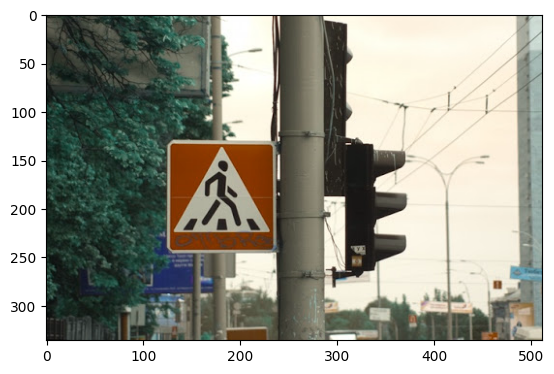

In [4]:
pesh = cv2.imread('data/peshehod.jpeg')
plt.imshow(pesh) #перепутаны местами каналы, не забудьте!
plt.show()

Изображение отображается с некорректнымицветами. Дело в том, что часто при чтении изображения оно читается как BGR, а не RGB, но это не трудно исправить

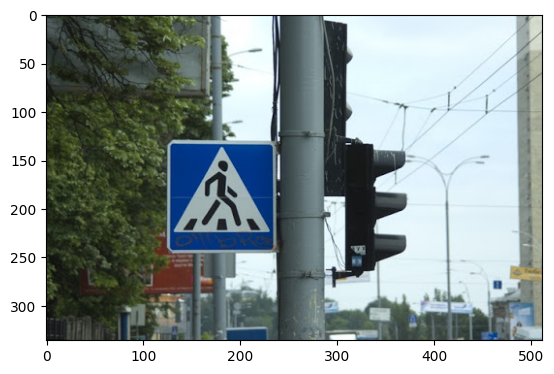

In [5]:
pesh = cv2.cvtColor(pesh, cv2.COLOR_BGR2RGB)
plt.imshow(pesh)
plt.show()

## Кадрирование

In [9]:
pesh.shape

(336, 512, 3)

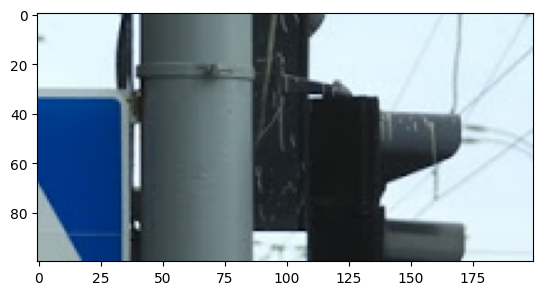

In [10]:
cropped_img = pesh[100:200, 200:400]
plt.imshow(cropped_img)
plt.show()

## Изменение размера

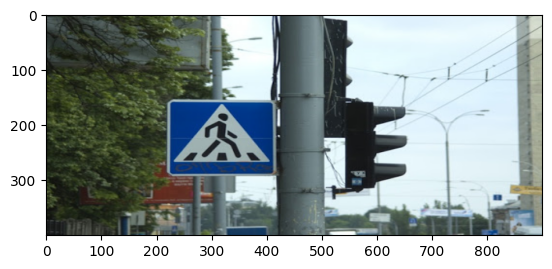

In [12]:
resized_img = cv2.resize(pesh, (900, 400), interpolation = cv2.INTER_AREA)
plt.imshow(resized_img)
plt.show()

## Рисование прямоугольника

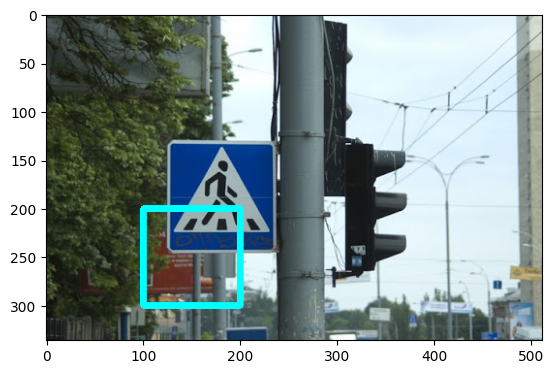

In [16]:
output = pesh.copy()
cv2.rectangle(output, (100, 200), (200, 300), (0, 255, 255), 5)
plt.imshow(output)
plt.show()

## Градация серого и treshold

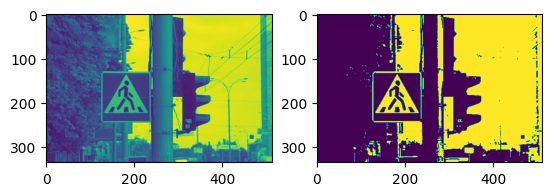

In [17]:
gray_img = cv2.cvtColor(pesh, cv2.COLOR_RGB2GRAY)
_, thresholded_img = cv2.threshold(gray_img, 127, 255, 0)
plt.subplot(121)
plt.imshow(gray_img)
plt.subplot(122)
plt.imshow(thresholded_img)
plt.show()

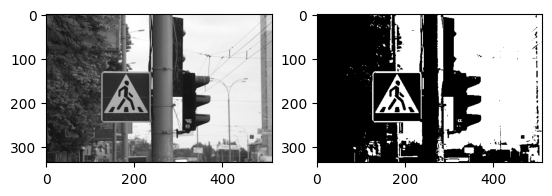

In [18]:
gray_img = cv2.cvtColor(pesh, cv2.COLOR_RGB2GRAY)
_, thresholded_img = cv2.threshold(gray_img, 127, 255, 0)
plt.subplot(121)
plt.imshow(gray_img, cmap='gray') # указываем цветовуюсхему для корректного отображения
plt.subplot(122)
plt.imshow(thresholded_img, cmap='gray')
plt.show()

## Фильтры

In [21]:
noise = np.random.randint(0, 255, pesh.shape).astype(np.uint8)
noisy_img = cv2.addWeighted(pesh, 0.7, noise, 0.3, 2.2) #кстати, это способ получить смесь изображений

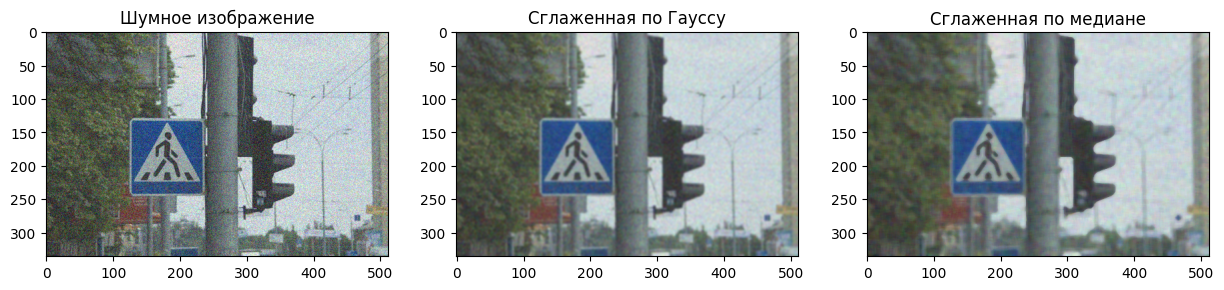

In [26]:
gblurred_img = cv2.GaussianBlur(noisy_img, (7, 7), 0)
mblurred_img = cv2.medianBlur(noisy_img, 7)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Шумное изображение')
plt.imshow(noisy_img)
plt.subplot(132)
plt.title('Сглаженная по Гауссу')
plt.imshow(gblurred_img)
plt.subplot(133)
plt.title('Сглаженная по медиане')
plt.imshow(mblurred_img)
plt.show()

## Задание 1
Для изображения знака сделайте threshold по порогу выше 180.

In [ ]:
#Введите число, полученное в результате выполнения кода ниже в строку для ответов
print(np.sum(thresholded_img)/255)

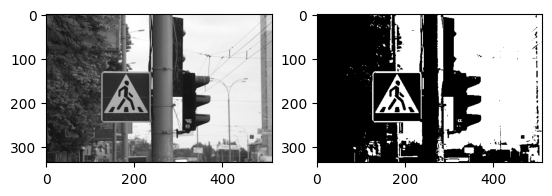

In [27]:
gray_img = cv2.cvtColor(pesh, cv2.COLOR_RGB2GRAY)
_, result_image = cv2.threshold(gray_img, 180, 255, 0)
plt.subplot(121)
plt.imshow(gray_img, cmap='gray') # указываем цветовую схему для корректного отображения
plt.subplot(122)
plt.imshow(thresholded_img, cmap='gray')
plt.show()

In [28]:
#Введите в поле для ответа число, которое получится после выполнения кода ниже:
print(np.sum(result_image[120:250, 120:250])/np.sum(result_image))

0.017064905425498808


# Библиотека skimage
Skimage содержит множество подмодулей. В каждом из них вы сможете найти различные способы обработки и преобразования картинок, например:

→ В подмодуле color находятся операции преобразования цветового пространства картинки:

`skimage.color.rgb2gray` — преобразование цветного изображения в чёрно-белое.
`skimage.color.rgb2hsv` — преобразование цветового пространства в HSV.
→ В подмодуле exposure хранятся инструменты для регулировки интенсивности изображения. 

`skimage.exposure.match_histograms` — сопоставление гистограмм; гистограмма входной картинки будет соответствовать гистограмме эталонного изображения.
`exposure.rescale_intensity` — изменение уровня интенсивности картинки.
`exposure.equalize_hist` — выравнивание гистограммы для улучшения контрастности изображений.

## Class Dataset

In [12]:
from PIL import Image
from torchvision import transforms
from IPython.display import clear_output
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation((-30,30)),
        transforms.RandomGrayscale(p=0.3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [7]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, path_data, transforms):
        self.path_data = path_data
        self.image_paths = os.listdir(self.path_data)
        self.transforms = transforms


    def __len__(self):
        return len(self.image_paths)


    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.path_data, self.image_paths[idx]))
        image = self.transforms(image)
        return torch.FloatTensor(image)

train_data = Dataset('data/data_cats/cats', transforms=data_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)

In [8]:
imgs = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


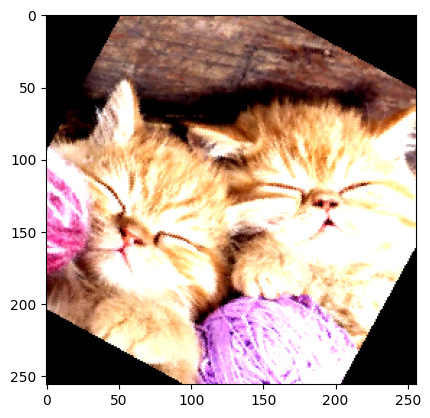

In [9]:
imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


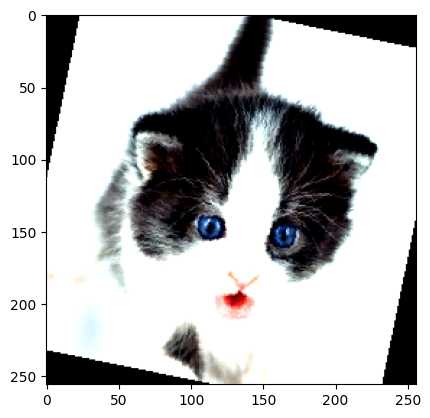

In [10]:
import time
epoch_counts = 5
for epoch in range(epoch_counts):
    for img in train_loader:
        imshow(img[0])
        time.sleep(2)
        clear_output(True)

Вам необходимо написать класс Dataset, который возвращает пары (изображение, его категория). Изображения нужно использовать из папки cats, которую мы использовали до этого, а категории нужно взять из csv файла. В csv файле две колонки, filename - имя изображения и category - его категория.

In [11]:
test_transforms = transforms.Compose([
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [43]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_folder_path, category_path, transforms):
        self.image_folder_path = image_folder_path
        self.image_paths = os.listdir(self.image_folder_path)
        self.category_path = category_path
        self.transforms = transforms


    def __len__(self):
        return len(self.image_paths)


    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.image_folder_path, self.image_paths[idx]))
        image = self.transforms(image)
        category_csv = pd.read_csv(self.category_path, index_col=0)
        category = category_csv[category_csv['filename'] == self.image_paths[idx]]['category'].iloc[0]
        return (torch.FloatTensor(image), torch.tensor(category))


train_data = Dataset('data/data_cats/cats', 'data/data_cats/cats_categories.csv', transforms=test_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=5, shuffle=True)

In [44]:
imgs, cats = next(iter(train_loader))

In [46]:
def test(imgs, cats):
    image3 = Image.open('data/data_cats/cats/3.jpeg')
    image3 = test_transforms(image3)
    image1 = Image.open('data/data_cats/cats/1.jpeg')
    image1 = test_transforms(image1)
    assert imgs.size() == torch.Size([5, 3, 256, 256])
    assert (list(set(cats.numpy())) == np.array([0,1,2,3,4])).all()
    assert np.isclose(imgs[np.where(cats.numpy() == 0)[0][0]].numpy(), image3.numpy()).all()
    assert np.isclose(imgs[np.where(cats.numpy() == 4)[0][0]].numpy(), image1.numpy()).all()
    print('Успешно')

In [47]:
test(imgs, cats)

Успешно
